In [1]:
import numpy as np
import pandas as pd
import keras
import imageio
import os
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from scipy.misc import imresize
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
from glob import glob

Using TensorFlow backend.


In [2]:
os.chdir('..')
rootdir = os.getcwd()
datadir = os.path.join(rootdir,'data')

In [3]:
pic_paths = []

In [4]:
pic_paths = [y for x in os.walk(datadir) for y in glob(os.path.join(x[0], '*.jpg'))]

In [19]:
#def find_pics(path):
#    if '.jpg' in path:
#        pic_paths.append(path)
#    else:
#        new_dirs = os.listdir(path)
#        for d in new_dirs:
#            new_path = os.path.join(path,d)
#            find_pics(new_path)

In [28]:
#testdir = os.path.join(rootdir,'testdir')
#find_pics(testdir)

In [20]:
#find_pics(datadir)

In [5]:
import random
random.shuffle(pic_paths)
small_sample = pic_paths[:500]

In [6]:
images = [imageio.imread(i) for i in small_sample]

In [7]:
model = VGG16(weights='imagenet',include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
ims = np.array(images)
ims = ims/255
ims_resized = np.array([imresize(img, (224,224)) for img in ims])

C:\Users\narayani.wagle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
out = model.predict(ims_resized)

In [10]:
nbrs = NearestNeighbors(n_neighbors=3,algorithm='ball_tree').fit(out)

In [11]:
ioi = 3089 #index of image to search
test_image = pic_paths[ioi]
test_image = imageio.imread(test_image)

In [12]:
test_im = np.array(test_image)
test_im = imresize(test_im, (224,224))
test_im = np.expand_dims(test_im,axis=0)
test_out = model.predict(test_im)

C:\Users\narayani.wagle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [13]:
ind = nbrs.kneighbors(test_out,return_distance=False)

In [16]:
type(ind)

numpy.ndarray

In [19]:
type(ind[0])

numpy.ndarray

In [14]:
ind.shape

(1, 3)

<function matplotlib.pyplot.show(*args, **kw)>

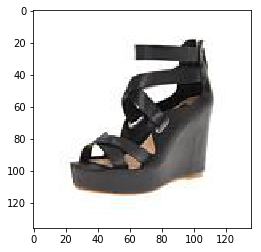

In [31]:
plt.imshow(test_image)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

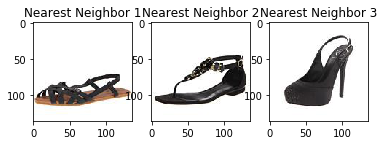

In [40]:
fig = plt.figure()
n = 1
for i in ind[0]:
    a = fig.add_subplot(1,3,n)
    plt.imshow(images[i])
    title = 'Nearest Neighbor ' + str(n)
    a.set_title(title)
    n = n+1
plt.show